In [1]:
import leukemiadrugscreen as leukdev

stack = leukdev.DeviceStack.from_folder("DVP_Aggregated")

In [2]:
def get_GI(region):
    GI = []
    for i in range(len(region.zones)):
        ncells_dose = sum(region.zones[i].cells["live"]==1)
        #ncells_dose = region.zones[i].num_cells
        ncells_ctrl = sum(region.zones[-1].cells["live"]==1)
        #ncells_ctrl = region.zones[-1].num_cells

        GI.append((ncells_ctrl - ncells_dose)/(ncells_ctrl))
    return GI

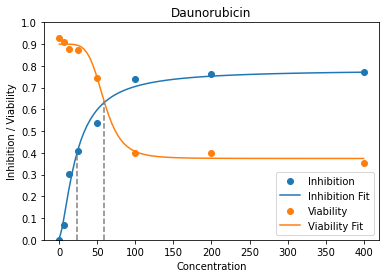

In [3]:
#region = leukdev.Region.from_point((0.5, 0.5, 0), stack)
region = leukdev.Region.from_bounds(([0.68, 0, 0], [1, 0.4, 0.4]), stack)
GI = get_GI(region)

from drugfit import Hill
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
hillfit_GI = Hill.fit(stack.dose[:,0], GI)
hillfit_GI.plot_curve()

hillfit_viability = Hill.fit(stack.dose[:,0], region.get_viability())
hillfit_viability.plot_curve()

ax.set_ylim(0,1)
ax.set_ylabel("Inhibition / Viability")
ax.set_xlabel("Concentration")
ax.set_title("Daunorubicin")
ax.legend(["Inhibition", "Inhibition Fit", "Viability", "Viability Fit"])
ax.set_yticks(np.linspace(0, 1, 11))

ax.axvline(hillfit_GI.C, 0, hillfit_GI.E(hillfit_GI.C), color = "0.5", linestyle = "--")
ax.axvline(hillfit_viability.C, 0, hillfit_viability.E(hillfit_viability.C), color = "0.5", linestyle = "--")

plt.show()

# what if we had the input number as well?
# or doubling time from control experiments
# method of Hafner et al


# another equation:

#You need to know the MAX (signal with no inhibition) and the MIN
# (signal with 100% inhibition).
# If X is the signal at a given concentration of inhibitor,
# calculate % inhibition with this equation:
# inhibition = 100 x [1 - (X - MIN)/(MAX - MIN)].

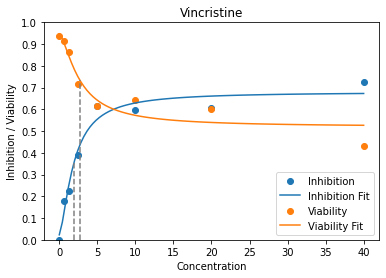

In [4]:
#region = leukdev.Region.from_point((0.5, 0.5, 0), stack)
region = leukdev.Region.from_bounds(([0, 0.68, 0], [0.4, 1, 0.4]), stack)
GI = get_GI(region)

from drugfit import Hill
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hillfit_GI = Hill.fit(stack.dose[:,1], GI)
hillfit_GI.plot_curve()

hillfit_viability = Hill.fit(stack.dose[:,1], region.get_viability())
hillfit_viability.plot_curve()

ax.set_ylim(0,1)
ax.set_ylabel("Inhibition / Viability")
ax.set_xlabel("Concentration")
ax.set_title("Vincristine")
ax.legend(["Inhibition", "Inhibition Fit", "Viability", "Viability Fit"])
ax.set_yticks(np.linspace(0, 1, 11))


ax.axvline(hillfit_GI.C, 0, hillfit_GI.E(hillfit_GI.C), color = "0.5", linestyle = "--")
ax.axvline(hillfit_viability.C, 0, hillfit_viability.E(hillfit_viability.C), color = "0.5", linestyle = "--")

plt.show()

# what if we had the input number as well?
# or doubling time from control experiments
# method of Hafner et al


# another equation:

#You need to know the MAX (signal with no inhibition) and the MIN
# (signal with 100% inhibition).
# If X is the signal at a given concentration of inhibitor,
# calculate % inhibition with this equation:
# inhibition = 100 x [1 - (X - MIN)/(MAX - MIN)].

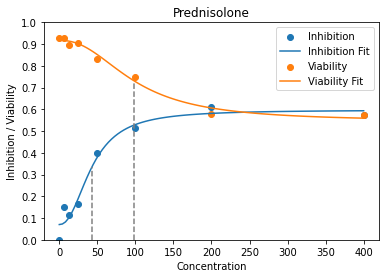

In [5]:
#region = leukdev.Region.from_point((0.5, 0.5, 0), stack)
region = leukdev.Region.from_bounds(([0, 0, 0.68], [0.4, 0.4, 1]), stack)
GI = get_GI(region)

from drugfit import Hill
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hillfit_GI = Hill.fit(stack.dose[:,2], GI)
hillfit_GI.plot_curve()

hillfit_viability = Hill.fit(stack.dose[:,2], region.get_viability())
hillfit_viability.plot_curve()

ax.set_ylim(0,1)
ax.set_ylabel("Inhibition / Viability")
ax.set_xlabel("Concentration")
ax.set_title("Prednisolone")
ax.legend(["Inhibition", "Inhibition Fit", "Viability", "Viability Fit"])
ax.set_yticks(np.linspace(0, 1, 11))


ax.axvline(hillfit_GI.C, 0, hillfit_GI.E(hillfit_GI.C), color = "0.5", linestyle = "--")
ax.axvline(hillfit_viability.C, 0, hillfit_viability.E(hillfit_viability.C), color = "0.5", linestyle = "--")

plt.show()

# what if we had the input number as well?
# or doubling time from control experiments
# method of Hafner et al


# another equation:

#You need to know the MAX (signal with no inhibition) and the MIN
# (signal with 100% inhibition).
# If X is the signal at a given concentration of inhibitor,
# calculate % inhibition with this equation:
# inhibition = 100 x [1 - (X - MIN)/(MAX - MIN)].

In [6]:
# Hill fit for GI single drug
d1_bounds = ([0.68, 0, 0], [1, 0.4, 0.4])
region1 = leukdev.Region.from_bounds(d1_bounds, stack)
d2_bounds = ([0, 0.68, 0], [0.4, 1, 0.4])
region2 = leukdev.Region.from_bounds(d2_bounds, stack)
d3_bounds = ([0, 0, 0.68], [0.4, 0.4, 1])
region3 = leukdev.Region.from_bounds(d3_bounds, stack)

def singledrugfit(region, drug_idx):
    y = get_GI(region)
    x = region.stack.dose[:, drug_idx-1]
    hillfit = Hill.fit(x, y)
    return(hillfit)

stack.singledrugfits_GI = [
    singledrugfit(region1, 1),
    singledrugfit(region2, 2),
    singledrugfit(region3, 3)
]

stack.singledrugregions = [region1, region2, region3]

print(f"IC50 DNR: {stack.singledrugfits_GI[0].C:.2f}")
print(f"IC50 VCR: {stack.singledrugfits_GI[1].C:.2f}")
print(f"IC50 PDN: {stack.singledrugfits_GI[2].C:.2f}")

print(f"Max Inhi. DNR: {stack.singledrugfits_GI[0].Emax:.2f}")
print(f"Max Inhi. VCR: {stack.singledrugfits_GI[1].Emax:.2f}")
print(f"Max Inhi. PDN: {stack.singledrugfits_GI[2].Emax:.2f}")

IC50 DNR: 22.73
IC50 VCR: 1.90
IC50 PDN: 42.66
Max Inhi. DNR: 0.78
Max Inhi. VCR: 0.68
Max Inhi. PDN: 0.60


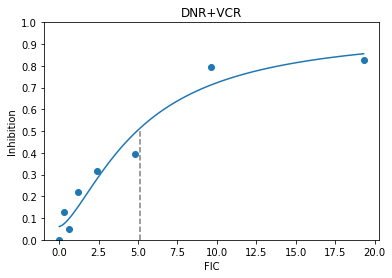

IC50 DNR+VCR: 5.11
Max Inhi. DNR+VCR: 0.96


In [7]:
# combination DNR+VCR
doses1 = stack.dose[:,0]
doses2 = stack.dose[:,1]
dose1_norm = (doses1/2) / stack.singledrugfits_GI[0].C
dose2_norm = (doses2/2) / stack.singledrugfits_GI[1].C

dose12 = dose1_norm + dose2_norm
region12 = leukdev.Region.from_point((0.5, 0.5, 0), stack)
hillfit_combo12 = Hill.fit(dose12, get_GI(region12))

fig, ax = plt.subplots()

hillfit_combo12.plot_curve()
ax.set_ylim(0,1)
ax.set_yticks(np.linspace(0 , 1, 11))
ax.axvline(hillfit_combo12.C, 0, hillfit_combo12.E(hillfit_combo12.C), color = "0.5", linestyle = "--")
ax.set_ylabel("Inhibition")
ax.set_xlabel("FIC")
ax.set_title("DNR+VCR")

plt.show()
print(f"IC50 DNR+VCR: {hillfit_combo12.C:.2f}")
print(f"Max Inhi. DNR+VCR: {hillfit_combo12.Emax:.2f}")

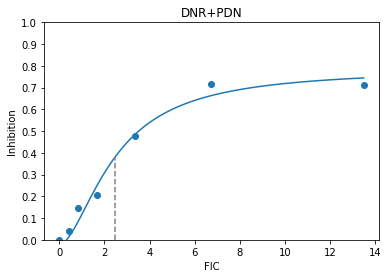

IC50 DNR+PDN: 2.47
Max Inhi. DNR+PDN: 0.79


In [8]:
# combination DNR+PDN
doses1 = stack.dose[:,0]
doses3 = stack.dose[:,2]
dose1_norm = (doses1/2) / stack.singledrugfits_GI[0].C
dose3_norm = (doses3/2) / stack.singledrugfits_GI[2].C
dose13 = dose1_norm + dose3_norm
region13 = leukdev.Region.from_point((0.5, 0, 0.5), stack)
hillfit_combo13 = Hill.fit(dose13, get_GI(region13))

fig, ax = plt.subplots()

hillfit_combo13.plot_curve()
ax.set_ylim(0,1)
ax.set_yticks(np.linspace(0 , 1, 11))
ax.axvline(hillfit_combo13.C, 0, hillfit_combo13.E(hillfit_combo13.C), color = "0.5", linestyle = "--")
ax.set_ylabel("Inhibition")
ax.set_xlabel("FIC")
ax.set_title("DNR+PDN")


plt.show()
print(f"IC50 DNR+PDN: {hillfit_combo13.C:.2f}")
print(f"Max Inhi. DNR+PDN: {hillfit_combo13.Emax:.2f}")

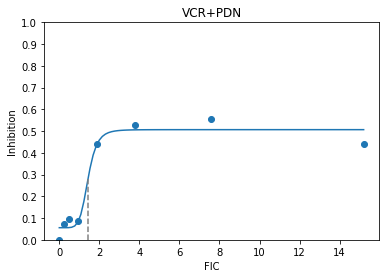

IC50 VCR+PDN: 1.44
Max Inhi. VCR+PDN: 0.51


In [9]:
# combination VCR+PDN
doses2 = stack.dose[:,1]
doses3 = stack.dose[:,2]
dose2_norm = (doses2/2) / stack.singledrugfits_GI[1].C
dose3_norm = (doses3/2) / stack.singledrugfits_GI[2].C

dose23 = (dose2_norm + dose3_norm)
region23 = leukdev.Region.from_point((0, 0.5, 0.5), stack)
hillfit_combo23 = Hill.fit(dose23, get_GI(region23))

fig, ax = plt.subplots()

hillfit_combo23.plot_curve()
ax.set_ylim(0,1)
ax.set_yticks(np.linspace(0 , 1, 11))
ax.axvline(hillfit_combo23.C, 0, hillfit_combo23.E(hillfit_combo23.C), color = "0.5", linestyle = "--")
ax.set_ylabel("Inhibition")
ax.set_xlabel("FIC")
ax.set_title("VCR+PDN")


plt.show()
print(f"IC50 VCR+PDN: {hillfit_combo23.C:.2f}")
print(f"Max Inhi. VCR+PDN: {hillfit_combo23.Emax:.2f}")

Implementing the GR method from Hafner et al. 2016

In [10]:
import math

cell_concentration = 2.75e6
device_volume = 4 # uL
x_0 = cell_concentration / 1000 * device_volume
print(x_0)

# find idx of ctrl device
def get_idx_ctrl(stack):
    idx_ctrl = stack.dose == 0
    for row_idx in range(idx_ctrl.shape[0]):
        true_sum = sum(idx_ctrl[row_idx, :])
        if true_sum == 3:
            idx_ctrl = row_idx
        
    if type(idx_ctrl) != int:
        raise Exception("Could not find control device where all doses equal to 0.")
    
    return idx_ctrl

idx_ctrl = get_idx_ctrl(stack)
print(idx_ctrl)
x_ctrl = sum(stack.devices[idx_ctrl].dataTable["live"])

k_0 = math.log2(x_ctrl / x_0)
print(f"x_0 = {x_0}")
print(f"x_ctrl = {x_ctrl}")
print(f"k_0 = {k_0:.2f}")

x_dev3 = sum(stack.devices[1].dataTable["live"])

k_3 = math.log2(x_dev3 / x_0)
print(f"k_dev3 = {k_3:.2f}")

GR = 2**(k_3 / k_0) - 1
print(f"GR = {GR:.2f}")

11000.0
7
x_0 = 11000.0
x_ctrl = 24485
k_0 = 1.15
k_dev3 = -0.54
GR = -0.28


To establish the GR per zones, the estimate cell count in each ternary region must first be established. There are two methods to do this:
1. Assume that the concentration map distribution is correct, then take proportional amount of cells in the zones after transformation to ternary coordinates.
2. Use simulation to randomly seed the x_0 cells in spatial coordinates, and transform to ternary coordinates and calculate the number of cells per zone.
3. Assume uniform growth rate throughout the device from the total cell count, and apply it on a per zone basis.

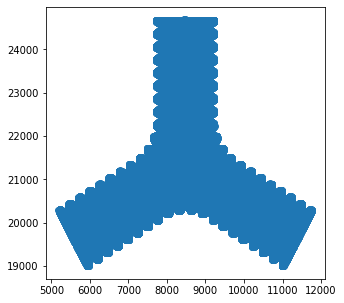

           x      y        c1        c2        c3  live
0       5935  18990  0.779778  0.018451  0.201283     1
1       5940  18990  0.787386  0.018220  0.193906     1
2       5930  18995  0.760367  0.019060  0.220085     1
3       5935  18995  0.769515  0.018779  0.211218     1
4       5940  18995  0.777199  0.018546  0.203766     1
...      ...    ...       ...       ...       ...   ...
520842  9650  21515  0.160819  0.751455  0.087236     1
520843  9655  21515  0.155013  0.759764  0.084733     1
520844  9660  21515  0.150353  0.766467  0.082690     1
520845  9650  21520  0.155381  0.759103  0.085026     1
520846  9655  21520  0.147213  0.770706  0.081591     1

[520847 rows x 6 columns]


In [11]:
# Method 1: assume concentration map distribution
conc_map = leukdev.devicesim.load_map()

from matplotlib import pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.scatter(conc_map["x"], conc_map["y"])
plt.show()

# makes this have the same columns and datatypes
conc_map["live"] = np.ones((len(conc_map), 1), dtype = int)
print(conc_map)

In [12]:
print(stack.devices[7].dataTable)

                 x            y        c1        c2        c3  live
0      1478.296296   966.518519  0.021556  0.701886  0.276069     1
1      1484.333333   966.303030  0.020915  0.722205  0.256390     1
2      1474.250000   969.333333  0.022069  0.686175  0.291267     1
3      1481.395349   971.465116  0.021580  0.702378  0.275553     1
4      1484.777778   975.370370  0.021579  0.703290  0.274641     1
...            ...          ...       ...       ...       ...   ...
26454  1446.805556  2579.944444  0.348376  0.626941  0.024196     0
26455  1435.000000  2584.096774  0.359839  0.615422  0.024251     0
26456  1461.500000  2586.800000  0.335393  0.640402  0.023717     0
26457  1466.653846  2595.384615  0.000000  0.000000  0.000000     0
26458  1470.484848  2619.818182  0.286514  0.691681  0.021317     0

[26459 rows x 6 columns]


In [13]:
tern_grid = leukdev.EC50_tern.gen_tern_grid(11)
print(tern_grid)

      a    b    c
0   0.0  0.0  1.0
1   0.0  0.1  0.9
2   0.0  0.2  0.8
3   0.0  0.3  0.7
4   0.0  0.4  0.6
..  ...  ...  ...
61  0.8  0.1  0.1
62  0.8  0.2  0.0
63  0.9  0.0  0.1
64  0.9  0.1  0.0
65  1.0  0.0  0.0

[66 rows x 3 columns]


In [14]:


# select Zones and calculate num cells for each
ctrl_device = leukdev.Device(conc_map, ["A", "B", "C"], [0, 0, 0], "a.u.")

num_cells = np.empty([len(tern_grid), 1])
for i in range(len(tern_grid)):
    zone = leukdev.Zone.from_point((tern_grid["a"][i], tern_grid["b"][i], tern_grid["c"][i]), ctrl_device)
    num_cells[i] = zone.num_cells

tern_grid["num"] = num_cells
print(tern_grid)



      a    b    c      num
0   0.0  0.0  1.0      0.0
1   0.0  0.1  0.9      0.0
2   0.0  0.2  0.8    846.0
3   0.0  0.3  0.7   6052.0
4   0.0  0.4  0.6  11249.0
..  ...  ...  ...      ...
61  0.8  0.1  0.1     24.0
62  0.8  0.2  0.0    875.0
63  0.9  0.0  0.1      0.0
64  0.9  0.1  0.0      0.0
65  1.0  0.0  0.0      0.0

[66 rows x 4 columns]


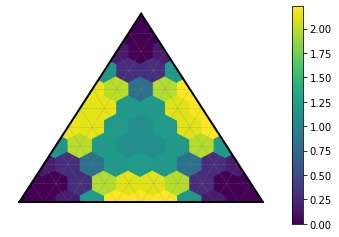

In [15]:
import ternary

tern_grid["proportion"] = tern_grid["num"] / len(conc_map)

# plotting EC50
plot_data = dict()
for x in range(len(tern_grid)):
    i = int(tern_grid["a"][x]*10)
    j = int(tern_grid["b"][x]*10)
    plot_data[(i,j)] = tern_grid["proportion"][x] * 100

figure, tax = ternary.figure(scale = 10)
#tax.gridlines(color = "black", multiple = 1)
tax.heatmap(plot_data, style = "hexagonal")
#tax.heatmap(plot_data, style = "hexagonal", cmap = "coolwarm_r", vmax = 2, vmin = 0)
fontsize = 12
#tax.right_corner_label(stack.drug_names[0], fontsize = fontsize)
#tax.top_corner_label(stack.drug_names[1], fontsize = fontsize)
#tax.left_corner_label(stack.drug_names[2], fontsize = fontsize)

tax.gridlines(color = "grey", multiple = 1)
tax.get_axes().axis('off')
#tax.ticks(axis = 'lbr', multiple = 1, linewidth = 1, offset = 0.025)
tax.clear_matplotlib_ticks()
tax.boundary(linewidth = 2.0)

tax.show()

In [16]:
# check to see if the assumption that growth rate is steady is good
num_cells_ctrl = np.empty([len(tern_grid), 1])
for i in range(len(tern_grid)):
    zone = leukdev.Zone.from_point((tern_grid["a"][i], tern_grid["b"][i], tern_grid["c"][i]), stack.devices[idx_ctrl])
    num_cells[i] = zone.num_cells

tern_grid["num_ctrl"] = num_cells
tern_grid["x_0_normalized"] = tern_grid["proportion"] * x_0
tern_grid["k_0"] = (tern_grid["num_ctrl"] / tern_grid["x_0_normalized"])
tern_grid["k_0"] = np.log2(tern_grid["k_0"])
print(tern_grid)

      a    b    c      num  proportion  num_ctrl  x_0_normalized       k_0
0   0.0  0.0  1.0      0.0    0.000000       0.0        0.000000       NaN
1   0.0  0.1  0.9      0.0    0.000000       0.0        0.000000       NaN
2   0.0  0.2  0.8    846.0    0.001624      32.0       17.867051  0.840770
3   0.0  0.3  0.7   6052.0    0.011620     390.0      127.814886  1.609418
4   0.0  0.4  0.6  11249.0    0.021598     496.0      237.572646  1.061971
..  ...  ...  ...      ...         ...       ...             ...       ...
61  0.8  0.1  0.1     24.0    0.000046       0.0        0.506867      -inf
62  0.8  0.2  0.0    875.0    0.001680      44.0       18.479515  1.251577
63  0.9  0.0  0.1      0.0    0.000000       0.0        0.000000       NaN
64  0.9  0.1  0.0      0.0    0.000000       0.0        0.000000       NaN
65  1.0  0.0  0.0      0.0    0.000000       0.0        0.000000       NaN

[66 rows x 8 columns]


c:\Users\Dan\python-virtual-environments\drug\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log2



In [17]:
tern_grid = tern_grid.replace(-np.inf, np.nan)
tern_grid = tern_grid.replace(np.inf, np.nan)
tern_grid = tern_grid.replace(np.nan, 0)

print(tern_grid)

      a    b    c      num  proportion  num_ctrl  x_0_normalized       k_0
0   0.0  0.0  1.0      0.0    0.000000       0.0        0.000000  0.000000
1   0.0  0.1  0.9      0.0    0.000000       0.0        0.000000  0.000000
2   0.0  0.2  0.8    846.0    0.001624      32.0       17.867051  0.840770
3   0.0  0.3  0.7   6052.0    0.011620     390.0      127.814886  1.609418
4   0.0  0.4  0.6  11249.0    0.021598     496.0      237.572646  1.061971
..  ...  ...  ...      ...         ...       ...             ...       ...
61  0.8  0.1  0.1     24.0    0.000046       0.0        0.506867  0.000000
62  0.8  0.2  0.0    875.0    0.001680      44.0       18.479515  1.251577
63  0.9  0.0  0.1      0.0    0.000000       0.0        0.000000  0.000000
64  0.9  0.1  0.0      0.0    0.000000       0.0        0.000000  0.000000
65  1.0  0.0  0.0      0.0    0.000000       0.0        0.000000  0.000000

[66 rows x 8 columns]


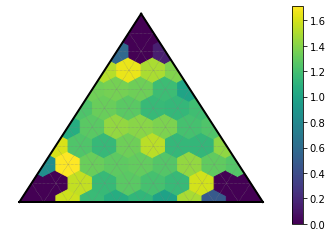

In [18]:
# plotting growth rate
plot_data = dict()
for x in range(len(tern_grid)):
    i = int(tern_grid["a"][x]*10)
    j = int(tern_grid["b"][x]*10)
    plot_data[(i,j)] = tern_grid["k_0"][x]

figure, tax = ternary.figure(scale = 10)
#tax.gridlines(color = "black", multiple = 1)
tax.heatmap(plot_data, style = "hexagonal")
#tax.heatmap(plot_data, style = "hexagonal", cmap = "coolwarm_r", vmax = 2, vmin = 0)
fontsize = 12
#tax.right_corner_label(stack.drug_names[0], fontsize = fontsize)
#tax.top_corner_label(stack.drug_names[1], fontsize = fontsize)
#tax.left_corner_label(stack.drug_names[2], fontsize = fontsize)

tax.gridlines(color = "grey", multiple = 1)
tax.get_axes().axis('off')
#tax.ticks(axis = 'lbr', multiple = 1, linewidth = 1, offset = 0.025)
tax.clear_matplotlib_ticks()
tax.boundary(linewidth = 2.0)

tax.show()

In [19]:
# GR definition from regions

# need to normalize against ctrl_device

def get_GR(region):
    conc_map = leukdev.devicesim.load_map()
    conc_map["live"] = np.ones((len(conc_map), 1), dtype = int)
    
    GR = []
    num_cells = []
    cell_concentration = 2.75e6
    device_volume = 4 # uL
    x_0 = cell_concentration / 1000 * device_volume

    x_0_raw = cell_concentration / 1000 * device_volume
    print(f"x_0 original: {x_0_raw}")

    # normalize x_0 to region
    ctrl_device = leukdev.Device(conc_map, ["A", "B", "C"], [0, 0, 0], "a.u.")
    ctrl_zone = leukdev.Zone.from_bounds(region.bounds, ctrl_device)
    proportion = ctrl_zone.num_cells / len(conc_map)
    print(f"Simulated cells: {ctrl_zone.num_cells}")
    print(f"Simulated device # cells: {len(ctrl_device.dataTable)}")
    x_0 = x_0 * proportion

    # try sampling method instead
    #conc_map_sampled = conc_map.sample(int(cell_concentration/1000*device_volume))
    #ctrl_device = leukdev.Device(conc_map_sampled, ["A", "B", "C"], [0, 0, 0], "a.u.")
    #ctrl_zone = leukdev.Zone.from_bounds(region.bounds)
    #x_0 = ctrl_zone.num_cells


    # get ctrl device #s
    idx_ctrl = get_idx_ctrl(region.stack)
    x_ctrl = sum(region.zones[idx_ctrl].cells["live"])
    x_ctrl_raw = sum(stack.devices[idx_ctrl].dataTable["live"])
    print(f"x_ctrl original: {x_ctrl_raw}")

    print(f"idx of ctrl: {idx_ctrl}")

    k_0_raw = np.log2(x_ctrl_raw / x_0_raw)
    # growth rate of control
    k_0 = np.log2(x_ctrl / x_0)


    for i in range(len(region.zones)):
        x_c = sum(region.zones[i].cells["live"])
        k_c = np.log2(x_c / x_0)
        #print(k_c)
        GR.append(2**(k_c / k_0) - 1)
        num_cells.append(x_c)
    
    print(f"Proportion: {proportion}")
    print(f"x_0: {x_0}")
    print(f"x_ctrl: {x_ctrl}")
    print(f"k_0: {k_0}")
    print(f"num_cells: {num_cells}")
    
    return GR


In [20]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


x_0 original: 11000.0
Simulated cells: 10976
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.021073367034849005
x_0: 231.80703738333906
x_ctrl: 579
k_0: 1.3206389827159892
num_cells: [133, 138, 151, 269, 343, 403, 539, 579]


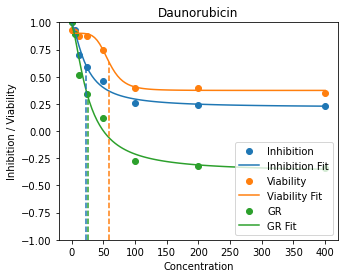

In [36]:
# plot GR metrics against viability and growth inhibition
region = leukdev.Region.from_bounds(([0.68, 0, 0], [1, 0.4, 0.4]), stack)
GI = 1 - np.array(get_GI(region))
GR = get_GR(region)


fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
hillfit_GI = Hill.fit(stack.dose[:,0], GI)
hillfit_GI.plot_curve()

hillfit_viability = Hill.fit(stack.dose[:,0], region.get_viability())
hillfit_viability.plot_curve()

hillfit_GR = Hill.fit(stack.dose[:,0], GR)
hillfit_GR.plot_curve()


ax.set_ylim(-1,1)
ax.set_ylabel("Inhibition / Viability")
ax.set_xlabel("Concentration")
ax.set_title("Daunorubicin")
ax.legend(["Inhibition", "Inhibition Fit", "Viability", "Viability Fit", "GR", "GR Fit"], loc = "lower right")
#ax.set_yticks(np.linspace(0, 1, 11))

ax.axvline(hillfit_GI.C, 0, (hillfit_GI.E(hillfit_GI.C)+1)/2, color = colors[0], linestyle = "--")
ax.axvline(hillfit_viability.C, 0, (hillfit_viability.E(hillfit_viability.C)+1)/2, color = colors[1], linestyle = "--")
ax.axvline(hillfit_GR.C, 0, (hillfit_GR.E(hillfit_GR.C)+1)/2, color = colors[2], linestyle = "--")

plt.show()


x_0 original: 11000.0
Simulated cells: 10957
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.02103688799205909
x_0: 231.40576791264996
x_ctrl: 576
k_0: 1.3156439868277656
num_cells: [159, 227, 231, 221, 352, 448, 472, 576]


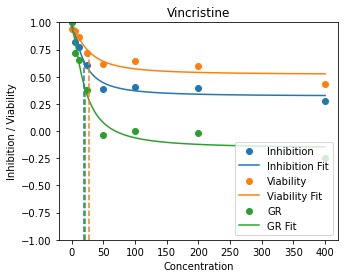

In [38]:
# plot GR metrics against viability and growth inhibition
region = leukdev.Region.from_bounds(([0, 0.68, 0], [0.4, 1, 0.4]), stack)
GI = 1 - np.array(get_GI(region))
GR = get_GR(region)


fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
hillfit_GI = Hill.fit(stack.dose[:,0], GI)
hillfit_GI.plot_curve()

hillfit_viability = Hill.fit(stack.dose[:,0], region.get_viability())
hillfit_viability.plot_curve()

hillfit_GR = Hill.fit(stack.dose[:,0], GR)
hillfit_GR.plot_curve()


ax.set_ylim(-1,1)
ax.set_ylabel("Inhibition / Viability")
ax.set_xlabel("Concentration")
ax.set_title("Vincristine")
ax.legend(["Inhibition", "Inhibition Fit", "Viability", "Viability Fit", "GR", "GR Fit"], loc = "lower right")
#ax.set_yticks(np.linspace(0, 1, 11))

ax.axvline(hillfit_GI.C, 0, (hillfit_GI.E(hillfit_GI.C)+1)/2, color = colors[0], linestyle = "--")
ax.axvline(hillfit_viability.C, 0, (hillfit_viability.E(hillfit_viability.C)+1)/2, color = colors[1], linestyle = "--")
ax.axvline(hillfit_GR.C, 0, (hillfit_GR.E(hillfit_GR.C)+1)/2, color = colors[2], linestyle = "--")

plt.show()


x_0 original: 11000.0
Simulated cells: 11067
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.021248082450316504
x_0: 233.72890695348156
x_ctrl: 574
k_0: 1.2962145631592779
num_cells: [244, 224, 280, 345, 480, 509, 487, 574]


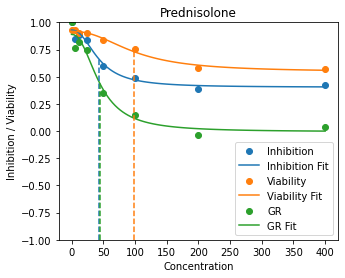

In [39]:
# plot GR metrics against viability and growth inhibition
region = leukdev.Region.from_bounds(([0, 0, 0.68], [0.4, 0.4, 1]), stack)
GI = get_GI(region)
GI = 1-np.array(GI)
GR = get_GR(region)


fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
hillfit_GI = Hill.fit(stack.dose[:,0], GI)
hillfit_GI.plot_curve()

hillfit_viability = Hill.fit(stack.dose[:,0], region.get_viability())
hillfit_viability.plot_curve()

hillfit_GR = Hill.fit(stack.dose[:,0], GR)
hillfit_GR.plot_curve()


ax.set_ylim(-1,1)
ax.set_ylabel("Inhibition / Viability")
ax.set_xlabel("Concentration")
ax.set_title("Prednisolone")
ax.legend(["Inhibition", "Inhibition Fit", "Viability", "Viability Fit", "GR", "GR Fit"], loc = "lower right")
#ax.set_yticks(np.linspace(0, 1, 11))

ax.axvline(hillfit_GI.C, 0, (hillfit_GI.E(hillfit_GI.C)+1)/2, color = colors[0], linestyle = "--")
ax.axvline(hillfit_viability.C, 0, (hillfit_viability.E(hillfit_viability.C)+1)/2, color = colors[1], linestyle = "--")
ax.axvline(hillfit_GR.C, 0, (hillfit_GR.E(hillfit_GR.C)+1)/2, color = colors[2], linestyle = "--")

plt.show()


In [24]:
# Hill fit for GI single drug
d1_bounds = ([0.68, 0, 0], [1, 0.4, 0.4])
region1 = leukdev.Region.from_bounds(d1_bounds, stack)
d2_bounds = ([0, 0.68, 0], [0.4, 1, 0.4])
region2 = leukdev.Region.from_bounds(d2_bounds, stack)
d3_bounds = ([0, 0, 0.68], [0.4, 0.4, 1])
region3 = leukdev.Region.from_bounds(d3_bounds, stack)

def singledrugfit(region, drug_idx):
    y = get_GR(region)
    x = region.stack.dose[:, drug_idx-1]
    hillfit = Hill.fit(x, y)
    return(hillfit)

stack.singledrugfits_GR = [
    singledrugfit(region1, 1),
    singledrugfit(region2, 2),
    singledrugfit(region3, 3)
]

stack.singledrugregions = [region1, region2, region3]

print(f"GR50 DNR: {stack.singledrugfits_GR[0].C:.2f}")
print(f"GR50 VCR: {stack.singledrugfits_GR[1].C:.2f}")
print(f"GR50 PDN: {stack.singledrugfits_GR[2].C:.2f}")

print(f"GR_max DNR: {stack.singledrugfits_GR[0].Emax:.2f}")
print(f"GR_max VCR: {stack.singledrugfits_GR[1].Emax:.2f}")
print(f"GR_max PDN: {stack.singledrugfits_GR[2].Emax:.2f}")

x_0 original: 11000.0
Simulated cells: 10976
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.021073367034849005
x_0: 231.80703738333906
x_ctrl: 579
k_0: 1.3206389827159892
num_cells: [133, 138, 151, 269, 343, 403, 539, 579]
x_0 original: 11000.0
Simulated cells: 10957
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.02103688799205909
x_0: 231.40576791264996
x_ctrl: 576
k_0: 1.3156439868277656
num_cells: [159, 227, 231, 221, 352, 448, 472, 576]
x_0 original: 11000.0
Simulated cells: 11067
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.021248082450316504
x_0: 233.72890695348156
x_ctrl: 574
k_0: 1.2962145631592779
num_cells: [244, 224, 280, 345, 480, 509, 487, 574]
GR50 DNR: 26.50
GR50 VCR: 2.08
GR50 PDN: 44.38
GR_max DNR: -0.37
GR_max VCR: -0.16
GR_max PDN: -0.01


x_0 original: 11000.0
Simulated cells: 11463
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.022008382500043198
x_0: 242.09220750047518
x_ctrl: 493
k_0: 1.0260310041988092
num_cells: [85, 102, 299, 336, 385, 468, 431, 493]


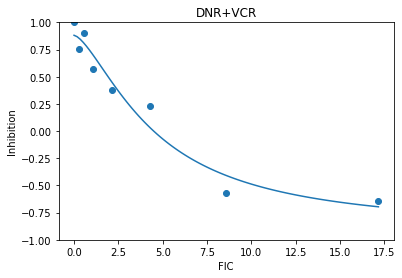

IC50 DNR+VCR: 4.61
Max Inhi. DNR+VCR: -0.92


In [40]:
# combination DNR+VCR
doses1 = stack.dose[:,0]
doses2 = stack.dose[:,1]
dose1_norm = (doses1/2) / stack.singledrugfits_GR[0].C
dose2_norm = (doses2/2) / stack.singledrugfits_GR[1].C

dose12 = dose1_norm + dose2_norm
region12 = leukdev.Region.from_point((0.5, 0.5, 0), stack)
hillfit_combo12 = Hill.fit(dose12, get_GR(region12))

fig, ax = plt.subplots()

hillfit_combo12.plot_curve()
ax.set_ylim(-1,1)
#ax.set_yticks(np.linspace(0 , 1, 11))
ax.axvline(hillfit_combo12.C, 0, hillfit_combo12.E(hillfit_combo12.C), color = "0.5", linestyle = "--")
ax.set_ylabel("Inhibition")
ax.set_xlabel("FIC")
ax.set_title("DNR+VCR")

plt.show()
print(f"IC50 DNR+VCR: {hillfit_combo12.C:.2f}")
print(f"Max Inhi. DNR+VCR: {hillfit_combo12.Emax:.2f}")

x_0 original: 11000.0
Simulated cells: 11480
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.022041021643592073
x_0: 242.4512380795128
x_ctrl: 476
k_0: 0.9732669526444584
num_cells: [137, 136, 249, 377, 407, 456, 519, 476]


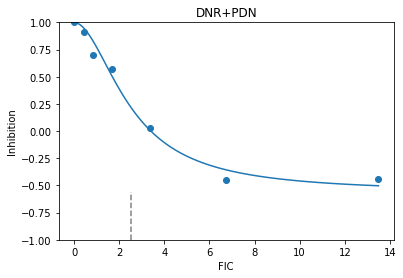

IC50 DNR+PDN: 2.52
Max Inhi. DNR+PDN: -0.56


In [41]:
# combination DNR+PDN
doses1 = stack.dose[:,0]
doses3 = stack.dose[:,2]
dose1_norm = (doses1/2) / stack.singledrugfits_GI[0].C
dose3_norm = (doses3/2) / stack.singledrugfits_GI[2].C
dose13 = dose1_norm + dose3_norm
region13 = leukdev.Region.from_point((0.5, 0, 0.5), stack)
hillfit_combo13 = Hill.fit(dose13, get_GR(region13))

fig, ax = plt.subplots()

hillfit_combo13.plot_curve()
ax.set_ylim(-1,1)
#ax.set_yticks(np.linspace(0 , 1, 11))
ax.axvline(hillfit_combo13.C, 0, hillfit_combo13.E(hillfit_combo13.C), color = "0.5", linestyle = "--")
ax.set_ylabel("Inhibition")
ax.set_xlabel("FIC")
ax.set_title("DNR+PDN")


plt.show()
print(f"IC50 DNR+PDN: {hillfit_combo13.C:.2f}")
print(f"Max Inhi. DNR+PDN: {hillfit_combo13.Emax:.2f}")

x_0 original: 11000.0
Simulated cells: 11112
Simulated device # cells: 520847
x_ctrl original: 24485
idx of ctrl: 7
Proportion: 0.021334480183239992
x_0: 234.6792820156399
x_ctrl: 495
k_0: 1.0767380418851444
num_cells: [278, 221, 234, 276, 453, 448, 459, 495]


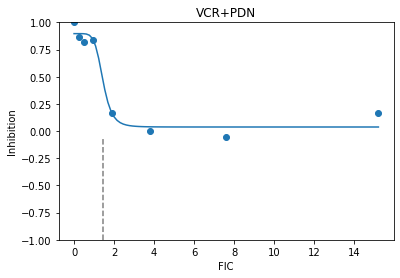

IC50 VCR+PDN: 1.44
Max Inhi. VCR+PDN: 0.04


In [43]:
# combination VCR+PDN
doses2 = stack.dose[:,1]
doses3 = stack.dose[:,2]
dose2_norm = (doses2/2) / stack.singledrugfits_GI[1].C
dose3_norm = (doses3/2) / stack.singledrugfits_GI[2].C

dose23 = (dose2_norm + dose3_norm)
region23 = leukdev.Region.from_point((0, 0.5, 0.5), stack)
hillfit_combo23 = Hill.fit(dose23, get_GR(region23))

fig, ax = plt.subplots()

hillfit_combo23.plot_curve()
ax.set_ylim(-1,1)
#ax.set_yticks(np.linspace(0 , 1, 11))
ax.axvline(hillfit_combo23.C, 0, hillfit_combo23.E(hillfit_combo23.C), color = "0.5", linestyle = "--")
ax.set_ylabel("Inhibition")
ax.set_xlabel("FIC")
ax.set_title("VCR+PDN")


plt.show()
print(f"IC50 VCR+PDN: {hillfit_combo23.C:.2f}")
print(f"Max Inhi. VCR+PDN: {hillfit_combo23.Emax:.2f}")

In [28]:
print(conc_map)

           x      y        c1        c2        c3  live
0       5935  18990  0.779778  0.018451  0.201283     1
1       5940  18990  0.787386  0.018220  0.193906     1
2       5930  18995  0.760367  0.019060  0.220085     1
3       5935  18995  0.769515  0.018779  0.211218     1
4       5940  18995  0.777199  0.018546  0.203766     1
...      ...    ...       ...       ...       ...   ...
520842  9650  21515  0.160819  0.751455  0.087236     1
520843  9655  21515  0.155013  0.759764  0.084733     1
520844  9660  21515  0.150353  0.766467  0.082690     1
520845  9650  21520  0.155381  0.759103  0.085026     1
520846  9655  21520  0.147213  0.770706  0.081591     1

[520847 rows x 6 columns]


In [29]:
conc_map_sampled = conc_map.sample(11000)
print(conc_map_sampled)

            x      y        c1        c2        c3  live
94637    6975  20600  0.422733  0.073178  0.503601     1
247399   9165  21820  0.195944  0.580962  0.222605     1
85962    5755  20490  0.268971  0.025641  0.704900     1
52467    7640  20120  0.654319  0.084101  0.261091     1
421166  10315  19670  0.647967  0.316942  0.034602     1
...       ...    ...       ...       ...       ...   ...
76471    6395  20375  0.407237  0.042444  0.549832     1
334317   9025  23405  0.043814  0.658239  0.297458     1
497940   9600  20695  0.440567  0.453113  0.105831     1
377851   8435  24215  0.030481  0.472272  0.496758     1
350929   8985  23715  0.035977  0.646964  0.316570     1

[11000 rows x 6 columns]
